<a href="https://colab.research.google.com/github/sagargahalod/Misc/blob/master/Wine_quality_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

## [Wine Quality Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality)

### Read data from archive.
In this case, it is a csv with header
In this case, it is a csv with header, separator is ';'
The download url is 
 http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Use the read_csv() method of pandas dataframe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Use `df` as the dataframe name

In this dataset the column names are already included in the .csv file

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url,sep=';')

### Show column names
Use the `columns` attribute of pandas on `df`

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Show portion of data
Use the `head` method of pandas dataframe

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Show histograms for all numeric values 
Use the `DataFrame.hist` method of Pandas. You can set the `figsize` parameter to adjust size

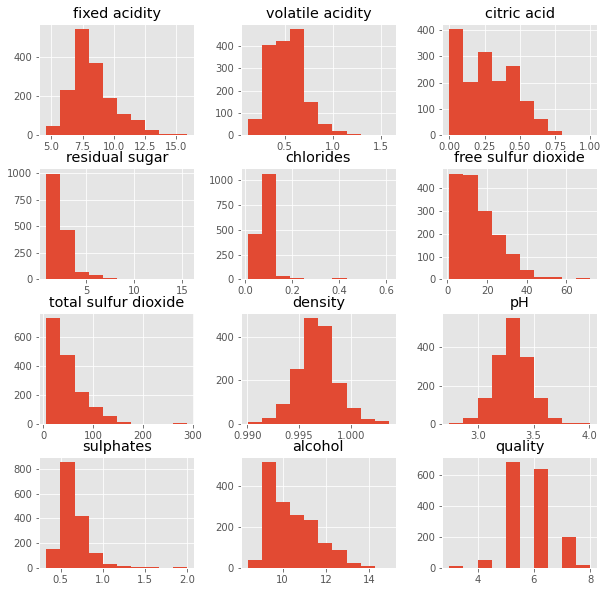

In [15]:
df.hist(figsize=(10,10));

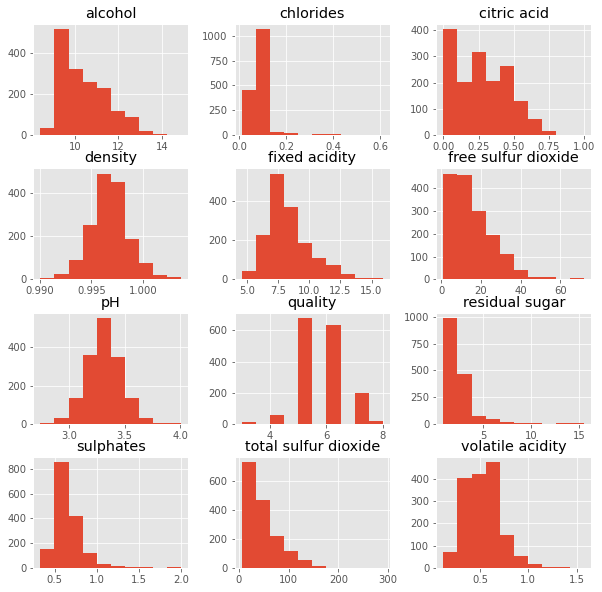

In [ ]:
pd.DataFrame.hist(df
                  , figsize = [10,10]
                 );

### Show synthetic description
Use the `describe` method of Pandas

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


__Quality__ is the target class in this dataset. The **describe** method of pandas dataframes gives a short summary

In [ ]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

CPU times: user 32.2 ms, sys: 0 ns, total: 32.2 ms
Wall time: 31.7 ms


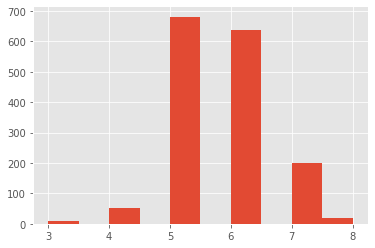

In [20]:
%%time
df.quality.hist();

### Plot an histogram for "quality"
Use the `hist` method of `matplotlib.pyplot` applied to the `quality` column of `df`

CPU times: user 25.8 ms, sys: 22 µs, total: 25.8 ms
Wall time: 28.7 ms


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

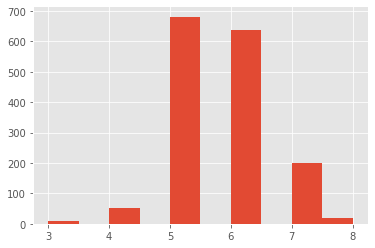

In [21]:
%%time
plt.hist(df['quality'])
#plt.show()

The `pairplot` of the *Seaborn* library is a powerful data exploration tool. It shows a plot of pairs of numeric attributes, and may represent as color the attribute chosen as class (the `hue` parameter). In this specific case the high number of attributes makes the representation not very clear.

Use df as argument to the `pairplot` method of Seaborn, specifying also `hue = 'quality'` and `diag_kws={'bw': 0.2}` (this last specification is a workaround necessary to deal with a singularity of this dataset

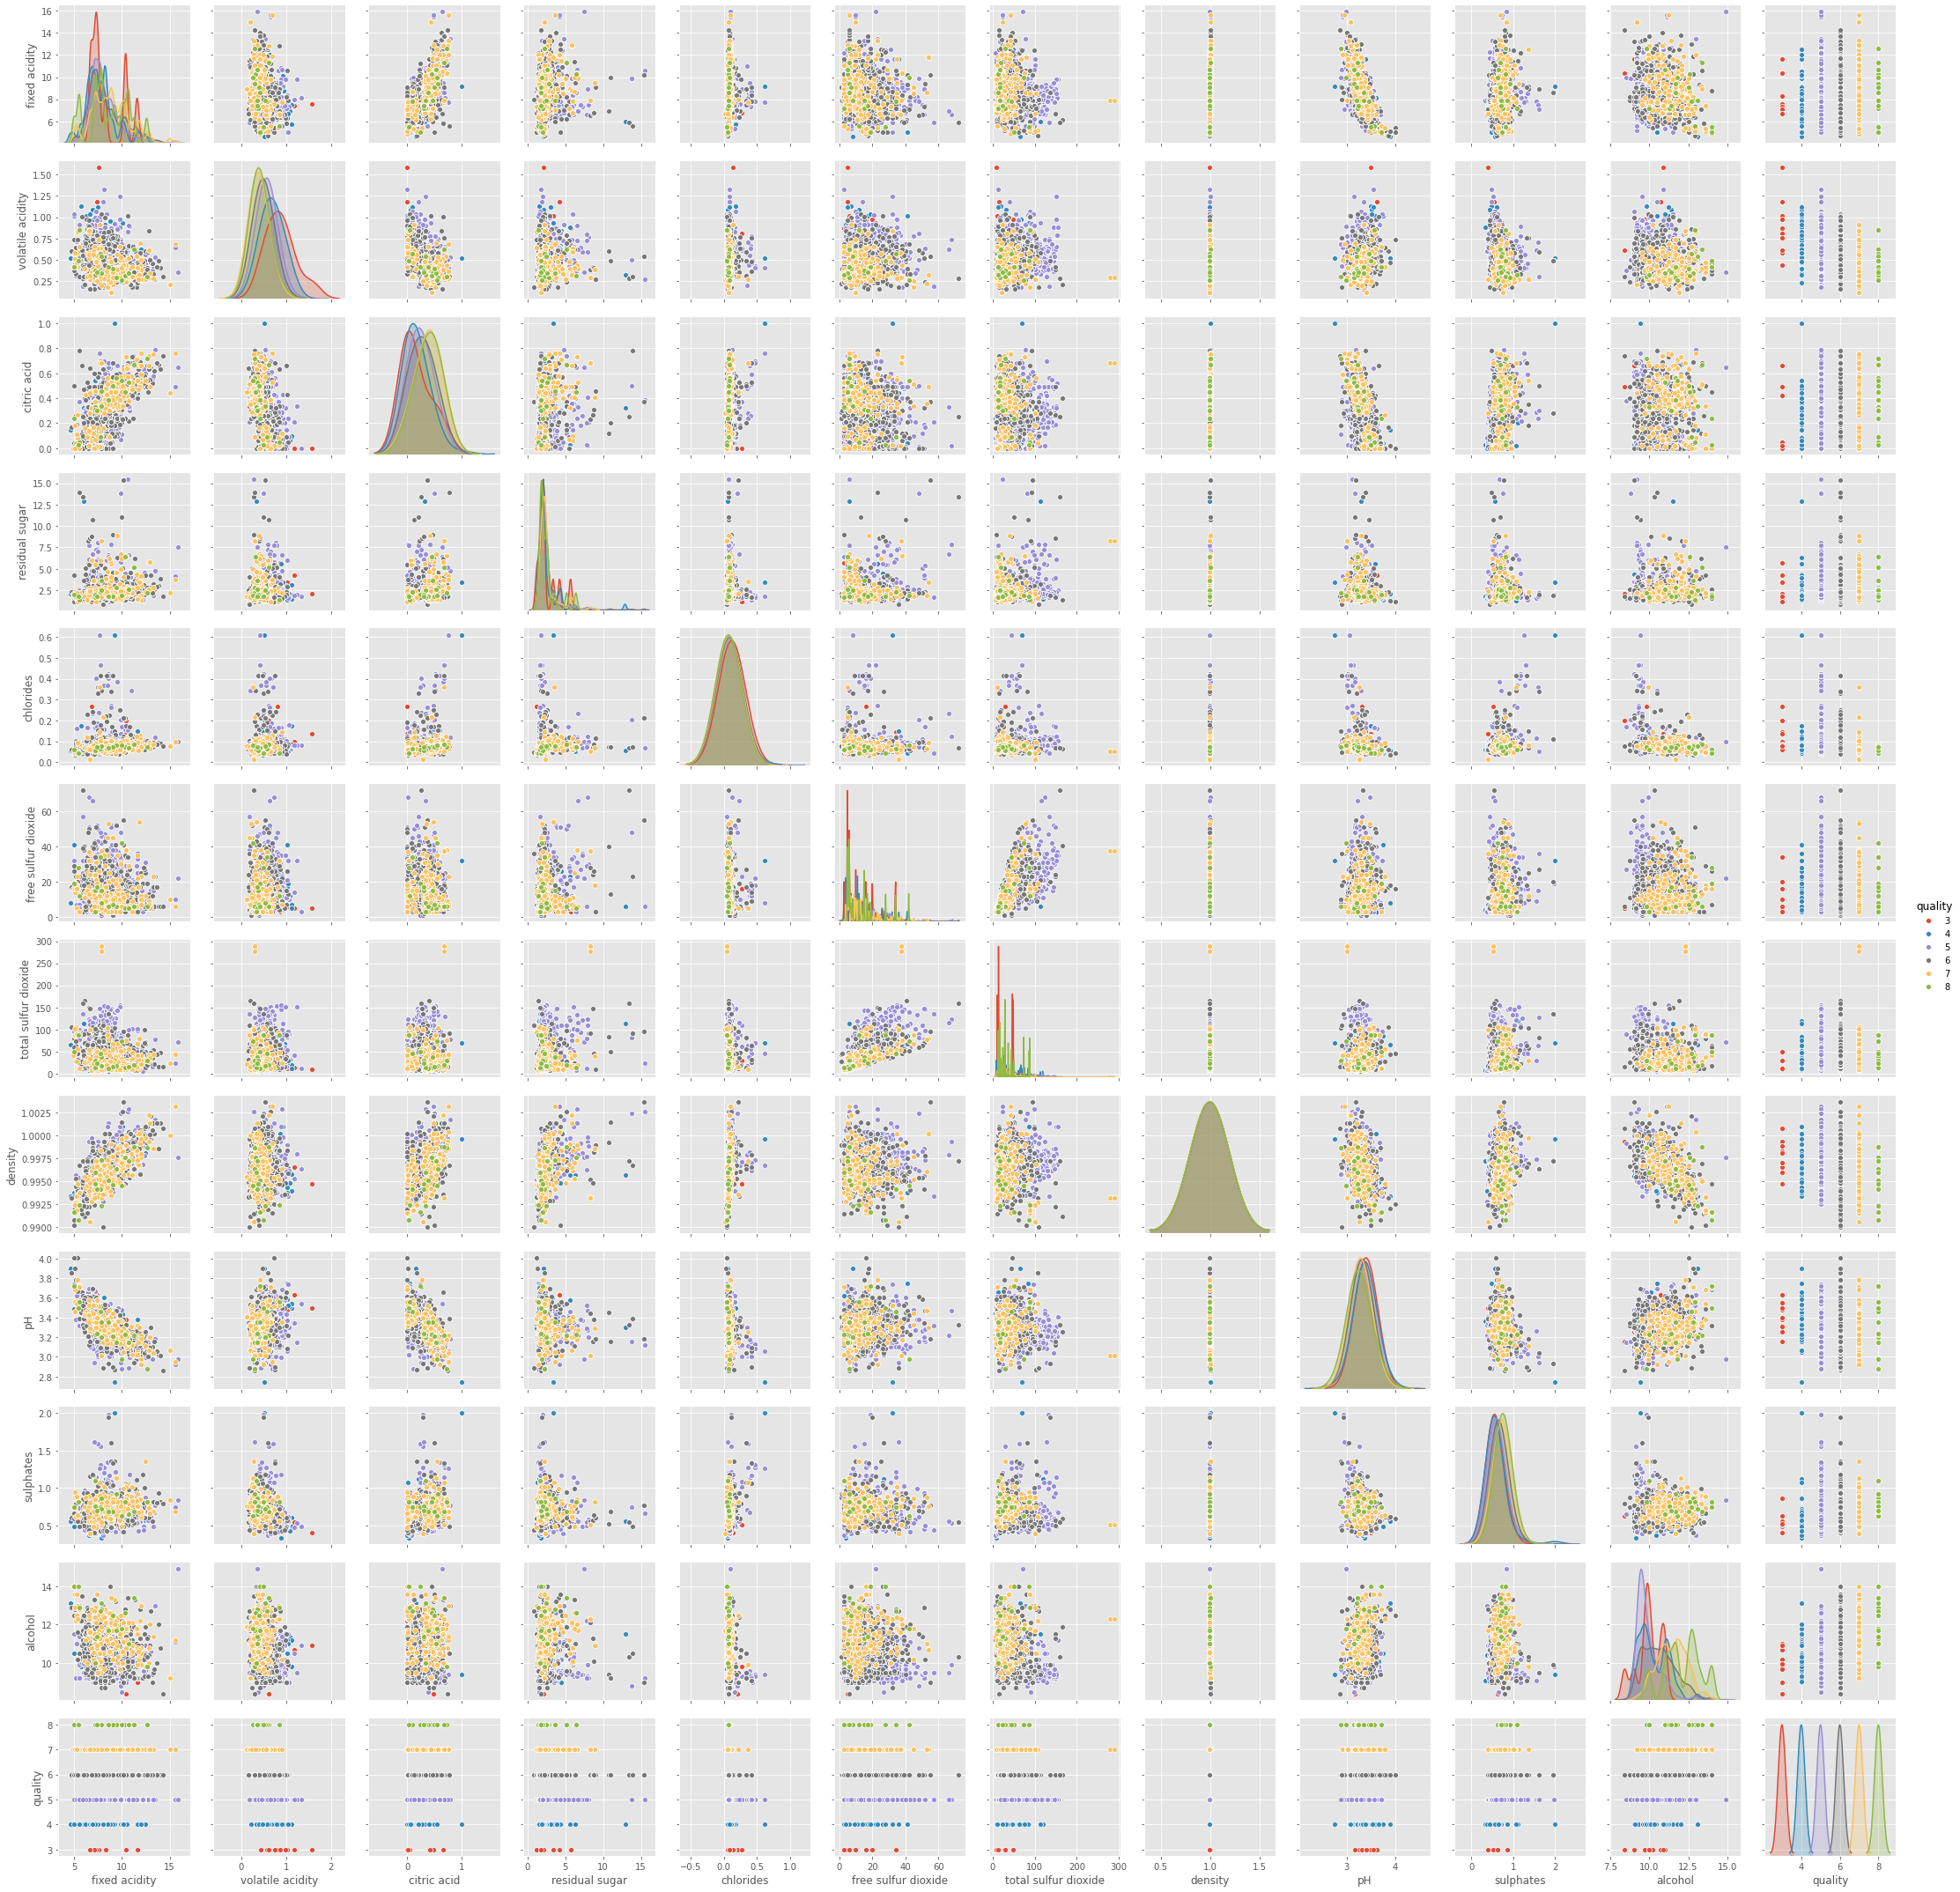

In [ ]:
sns.pairplot(df, hue = 'quality'
             , diag_kws={'bw': 0.2}
            )

Now we will explore the distribution of the values inside each column using the `boxplot`.

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data <br> (*from the official Seaborn documentation*)

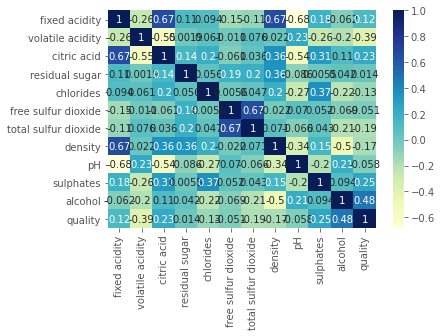

In [22]:
corr1 = df.corr()
sns.heatmap(corr1,cmap='YlGnBu',annot=True);

<AxesSubplot:>

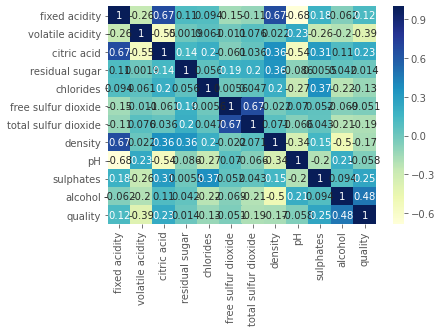

In [ ]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [ ]:
plt.figure(figsize=(10,10))
for i,col in enumerate(df.columns):
  plt.subplots(1,i)
  sns.boxplot(df[col])

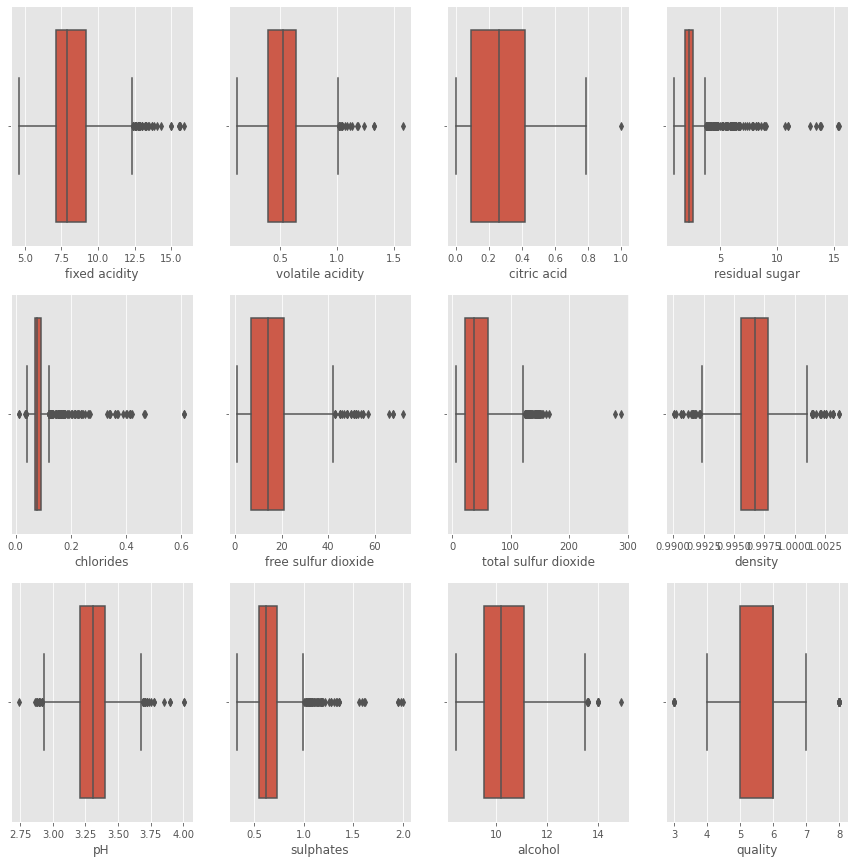

In [36]:
#--Checking Outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(df[i])
    pos += 1

In [41]:
for i,col in enumerate(df.columns):
  print(i,col)

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality


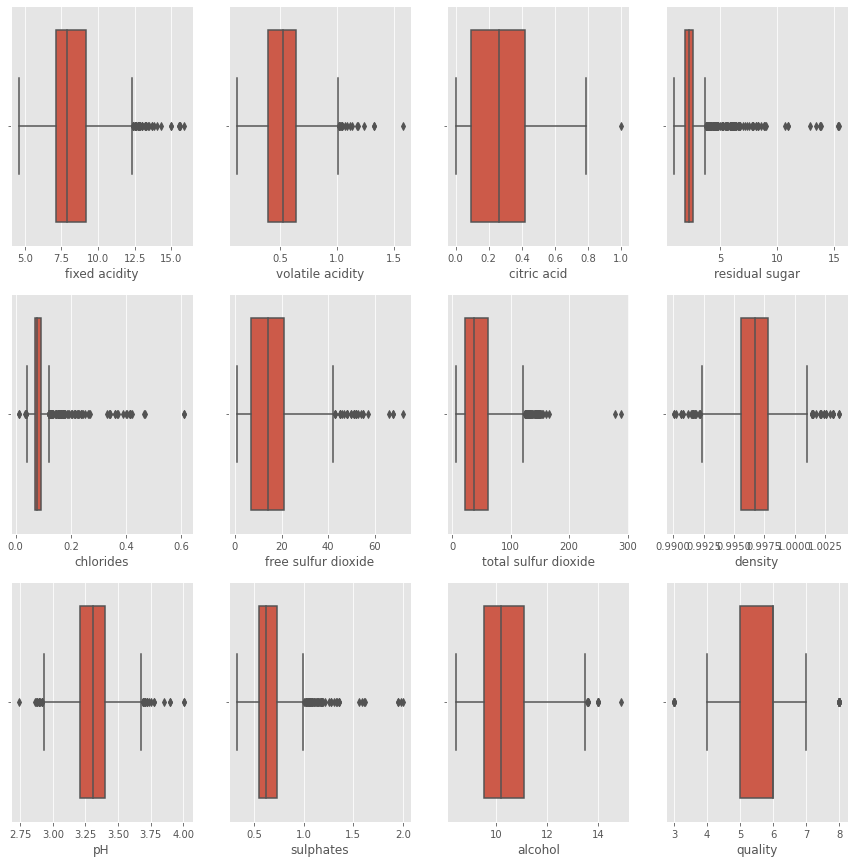

In [46]:
plt.figure(figsize=(15,15))
 
for i,col in enumerate(df.columns):
  plt.subplot(3,4,i+1)
  sns.boxplot(df[col])
  

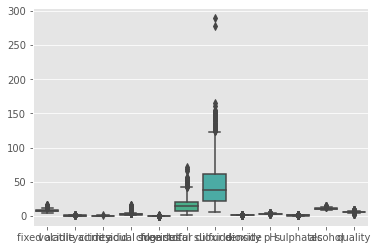

In [55]:
sns.boxplot(data = df)
 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

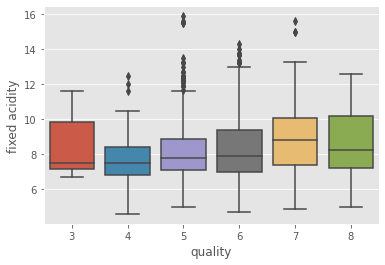

In [ ]:
# sns.boxplot(x=df.iloc[:,-1], y = df.iloc[:,0])
sns.boxplot(x='quality', y='fixed acidity', data = df)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

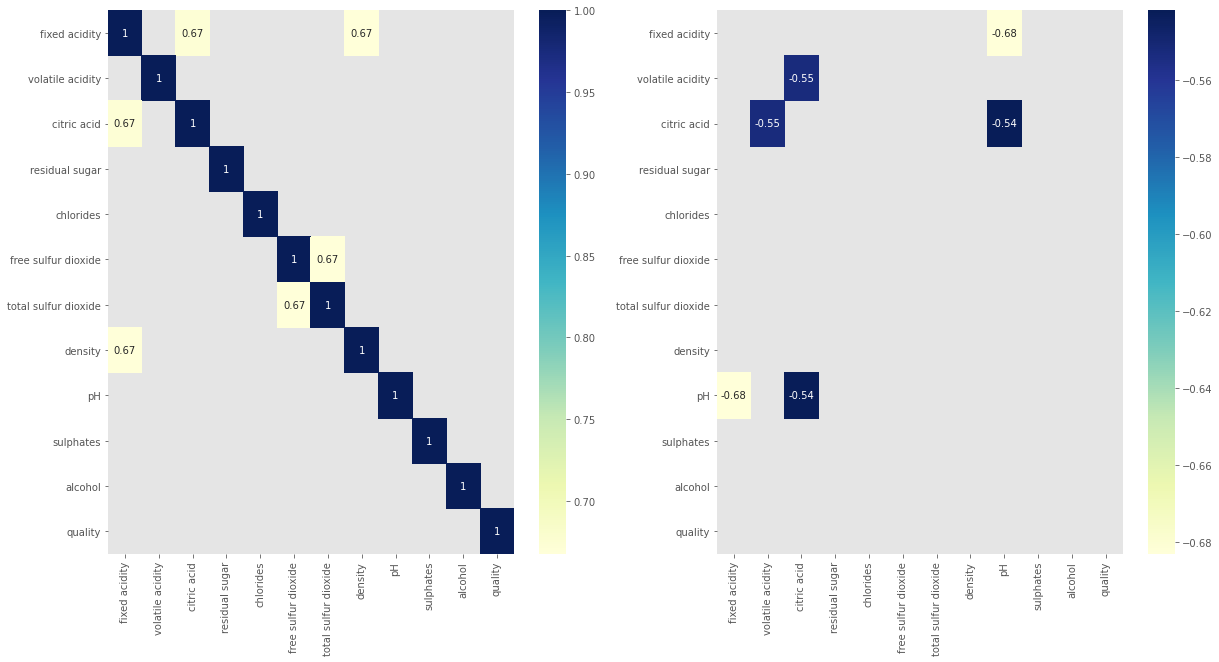

In [100]:
cor = df.corr()
mask = cor<0.5
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',mask=mask);
plt.subplot(1,2,2)
mask1 = cor>-0.5
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',mask=mask1);

ValueError: ignored

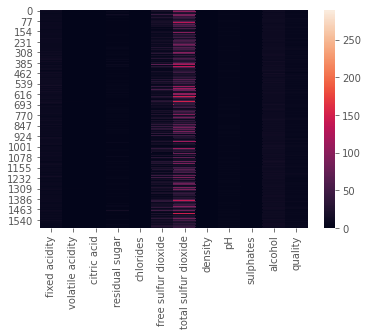

In [90]:
sns.heatmap(df)

In [101]:
X = np.array([[1, 1, 1],
              [2, 2, 0],
              [3, 3, 1],
              [4, 4, 0],
              [5, 5, 1],
              [6, 6, 0],
              [7, 7, 1],
              [8, 7, 0],
              [9, 7, 1]])

# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
df

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0
8,9,7,1


In [104]:
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [ ]:
sns.heatmap(corr_matrix,mask=upper)